# Modeling

In [1]:
import pandas as pd
import numpy as np
from glob import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Step 1: Load all feature CSVs

file_paths = sorted(glob("/Users/sarvesh/Desktop/stress-detection-wesad/data/features/S*_features.csv")) 
subject_ids = [f.split("/")[-1].split("_")[0] for f in file_paths]

In [3]:
# Step 2: Track metrics
accuracies = []
f1s = []
per_subject_reports = {}

In [4]:
# Step 3: LOSO loop
for i, test_subj in enumerate(subject_ids):
    print(f"\n🔄 Testing on {test_subj} (LOSO fold {i+1}/{len(subject_ids)})")

    test_df = pd.read_csv(file_paths[i])
    train_dfs = [pd.read_csv(f) for j, f in enumerate(file_paths) if j != i]
    train_df = pd.concat(train_dfs, ignore_index=True)

    # ✅ Filter only labels 1, 2, 3 and shift to 0-indexed for classifier
    valid_labels = [1, 2, 3]
    train_df = train_df[train_df['label'].isin(valid_labels)]
    test_df = test_df[test_df['label'].isin(valid_labels)]

    # Shift labels: 1→0, 2→1, 3→2
    train_df['label'] = train_df['label'] - 1
    test_df['label'] = test_df['label'] - 1

    X_train, y_train = train_df.drop(columns=['label']), train_df['label']
    X_test, y_test = test_df.drop(columns=['label']), test_df['label']

    # Step 4: Train model
    model = RandomForestClassifier(n_estimators=30, random_state=42)
    model.fit(X_train, y_train)

    # Step 5: Evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Map labels back to 1–3 for reporting
    y_pred_orig = y_pred + 1
    y_test_orig = y_test + 1

    class_names = ['Baseline (1)', 'Stress (2)', 'Amusement (3)']
    # print(classification_report(y_test_orig, y_pred_orig, target_names=class_names))

    accuracies.append(acc)
    f1s.append(f1)
    per_subject_reports[test_subj] = classification_report(y_test_orig, y_pred_orig, output_dict=True)

    print(f"✅ Accuracy: {acc:.4f} | F1 (weighted): {f1:.4f}")




🔄 Testing on S10 (LOSO fold 1/15)
✅ Accuracy: 0.8800 | F1 (weighted): 0.8502

🔄 Testing on S11 (LOSO fold 2/15)
✅ Accuracy: 0.8553 | F1 (weighted): 0.8431

🔄 Testing on S13 (LOSO fold 3/15)
✅ Accuracy: 0.9733 | F1 (weighted): 0.9728

🔄 Testing on S14 (LOSO fold 4/15)
✅ Accuracy: 0.8000 | F1 (weighted): 0.7496

🔄 Testing on S15 (LOSO fold 5/15)
✅ Accuracy: 0.8667 | F1 (weighted): 0.8646

🔄 Testing on S16 (LOSO fold 6/15)
✅ Accuracy: 0.9178 | F1 (weighted): 0.9090

🔄 Testing on S17 (LOSO fold 7/15)
✅ Accuracy: 0.9333 | F1 (weighted): 0.9297

🔄 Testing on S2 (LOSO fold 8/15)
✅ Accuracy: 0.5634 | F1 (weighted): 0.5403

🔄 Testing on S3 (LOSO fold 9/15)
✅ Accuracy: 0.5890 | F1 (weighted): 0.5795

🔄 Testing on S4 (LOSO fold 10/15)
✅ Accuracy: 0.8611 | F1 (weighted): 0.8405

🔄 Testing on S5 (LOSO fold 11/15)
✅ Accuracy: 0.7808 | F1 (weighted): 0.7679

🔄 Testing on S6 (LOSO fold 12/15)
✅ Accuracy: 0.8356 | F1 (weighted): 0.7644

🔄 Testing on S7 (LOSO fold 13/15)
✅ Accuracy: 0.6438 | F1 (weight

In [5]:
# Step 6: Summary
print("\n📊 LOSO Summary:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean F1 Score: {np.mean(f1s):.4f}")


📊 LOSO Summary:
Mean Accuracy: 0.8087
Mean F1 Score: 0.7873


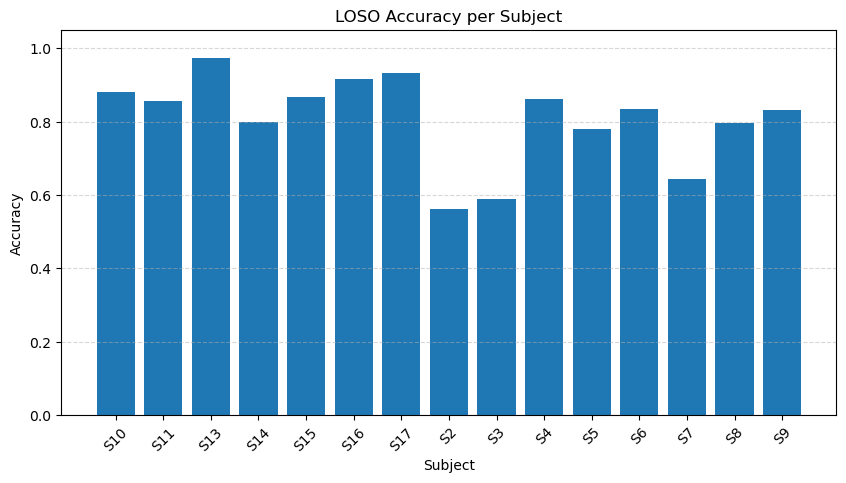

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(subject_ids, accuracies)
plt.title("LOSO Accuracy per Subject")
plt.ylabel("Accuracy")
plt.xlabel("Subject")
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


In [7]:
importances = model.feature_importances_  # only for tree-based models
pd.Series(importances, index=X_train.columns).sort_values(ascending=False).head(10)


eda_mean               0.325036
eda_peak_count         0.197939
resp_std               0.150090
eda_std                0.074152
eda_slope              0.071363
mean_rr                0.058861
ecg_peak_count         0.037914
resp_zero_crossings    0.037522
rmssd                  0.019035
resp_mean              0.015995
dtype: float64

In [8]:
# Step 3: LOSO loop
for i, test_subj in enumerate(subject_ids):
    print(f"\n🔄 Testing on {test_subj} (LOSO fold {i+1}/{len(subject_ids)})")

    test_df = pd.read_csv(file_paths[i])
    train_dfs = [pd.read_csv(f) for j, f in enumerate(file_paths) if j != i]
    train_df = pd.concat(train_dfs, ignore_index=True)

    # 🟢 No binary filtering; use all available labels
    X_train, y_train = train_df.drop(columns=['label']), train_df['label']
    X_test, y_test = test_df.drop(columns=['label']), test_df['label']

    # Step 4: Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Step 5: Evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # 🟢 Weighted F1 for multiclass

    accuracies.append(acc)
    f1s.append(f1)
    per_subject_reports[test_subj] = classification_report(y_test, y_pred, output_dict=True)

    print(f"✅ Accuracy: {acc:.4f} | F1 (weighted): {f1:.4f}")


🔄 Testing on S10 (LOSO fold 1/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.7418 | F1 (weighted): 0.7028

🔄 Testing on S11 (LOSO fold 2/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.6647 | F1 (weighted): 0.6366

🔄 Testing on S13 (LOSO fold 3/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.7213 | F1 (weighted): 0.6749

🔄 Testing on S14 (LOSO fold 4/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.5519 | F1 (weighted): 0.4882

🔄 Testing on S15 (LOSO fold 5/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.6149 | F1 (weighted): 0.5397

🔄 Testing on S16 (LOSO fold 6/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.7043 | F1 (weighted): 0.6612

🔄 Testing on S17 (LOSO fold 7/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.6122 | F1 (weighted): 0.5831

🔄 Testing on S2 (LOSO fold 8/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.4975 | F1 (weighted): 0.4006

🔄 Testing on S3 (LOSO fold 9/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.6698 | F1 (weighted): 0.6047

🔄 Testing on S4 (LOSO fold 10/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.5211 | F1 (weighted): 0.4688

🔄 Testing on S5 (LOSO fold 11/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.6715 | F1 (weighted): 0.6278

🔄 Testing on S6 (LOSO fold 12/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.7393 | F1 (weighted): 0.7003

🔄 Testing on S7 (LOSO fold 13/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.5029 | F1 (weighted): 0.4212

🔄 Testing on S8 (LOSO fold 14/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.4088 | F1 (weighted): 0.3340

🔄 Testing on S9 (LOSO fold 15/15)
✅ Accuracy: 0.6994 | F1 (weighted): 0.6611


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [10]:
!pip3 install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.8 MB/s eta 0:00:00


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd
import numpy as np
from glob import glob
import os


In [13]:

# Step 1: Load all CSVs
file_paths = sorted(glob("/Users/sarvesh/Desktop/wesad/data/features/S*_features.csv")) 
subject_ids = [f.split("/")[-1].split("_")[0] for f in file_paths]

# Step 2: Track metrics
accuracies = []
f1s = []
per_subject_reports = {}

# Step 3: LOSO Loop
for i, test_subj in enumerate(subject_ids):
    print(f"\n🔄 Testing on {test_subj} (LOSO fold {i+1}/{len(subject_ids)})")

    # Load test and train data
    test_df = pd.read_csv(file_paths[i])
    train_dfs = [pd.read_csv(f) for j, f in enumerate(file_paths) if j != i]
    train_df = pd.concat(train_dfs, ignore_index=True)

    # Filter to valid classes (e.g., 0: baseline, 1: stress, 2: amusement, 3: meditation)    offset by 1 as XGBoost expects [0,1,2,3]
    valid_classes = [0, 1, 2, 3]
    train_df = train_df[train_df['label'].isin(valid_classes)]
    test_df = test_df[test_df['label'].isin(valid_classes)]

    # Prepare features and labels
    X_train, y_train = train_df.drop(columns=['label']), train_df['label']
    X_test, y_test = test_df.drop(columns=['label']), test_df['label']

    # Step 4: Train XGBoost model
    model = XGBClassifier(objective='multi:softprob', num_class=4, eval_metric='mlogloss', use_label_encoder=False)
    model.fit(X_train, y_train)

    # Step 5: Evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracies.append(acc)
    f1s.append(f1)
    per_subject_reports[test_subj] = classification_report(y_test, y_pred, output_dict=True)

    print(f"✅ Accuracy: {acc:.4f} | F1 (weighted): {f1:.4f}")



🔄 Testing on S10 (LOSO fold 1/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:28:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.7718 | F1 (weighted): 0.7427

🔄 Testing on S11 (LOSO fold 2/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:28:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.6503 | F1 (weighted): 0.6573

🔄 Testing on S13 (LOSO fold 3/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:28:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.7237 | F1 (weighted): 0.6835

🔄 Testing on S14 (LOSO fold 4/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:28:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasc

✅ Accuracy: 0.5960 | F1 (weighted): 0.5413

🔄 Testing on S15 (LOSO fold 5/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

✅ Accuracy: 0.6713 | F1 (weighted): 0.6071

🔄 Testing on S16 (LOSO fold 6/15)
✅ Accuracy: 0.7338 | F1 (weighted): 0.7195

🔄 Testing on S17 (LOSO fold 7/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:28:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.6506 | F1 (weighted): 0.6528

🔄 Testing on S2 (LOSO fold 8/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:28:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasc

✅ Accuracy: 0.5698 | F1 (weighted): 0.4756

🔄 Testing on S3 (LOSO fold 9/15)
✅ Accuracy: 0.7198 | F1 (weighted): 0.6878

🔄 Testing on S4 (LOSO fold 10/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:28:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.4944 | F1 (weighted): 0.4619

🔄 Testing on S5 (LOSO fold 11/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:28:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.6818 | F1 (weighted): 0.6556

🔄 Testing on S6 (LOSO fold 12/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:28:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasc

✅ Accuracy: 0.7304 | F1 (weighted): 0.6990

🔄 Testing on S7 (LOSO fold 13/15)
✅ Accuracy: 0.4965 | F1 (weighted): 0.4962

🔄 Testing on S8 (LOSO fold 14/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:28:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.3867 | F1 (weighted): 0.2937

🔄 Testing on S9 (LOSO fold 15/15)


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [08:28:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.7571 | F1 (weighted): 0.7255


/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [14]:
print("\n📈 LOSO XGBoost Multiclass Summary:")
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average F1 Score:  {np.mean(f1s):.4f}")



📈 LOSO XGBoost Multiclass Summary:
Average Accuracy: 0.6423
Average F1 Score:  0.6066


In [15]:
y_pred_orig = y_pred + 1
y_test_orig = y_test + 1


In [16]:
from sklearn.metrics import classification_report

class_names = ['Baseline (1)', 'Stress (2)', 'Amusement (3)', 'Meditation (4)']
print(classification_report(y_test_orig, y_pred_orig, target_names=class_names))


                precision    recall  f1-score   support

  Baseline (1)       0.76      0.78      0.77        68
    Stress (2)       0.88      0.95      0.91        39
 Amusement (3)       0.57      0.76      0.65        21
Meditation (4)       0.00      0.00      0.00        12

      accuracy                           0.76       140
     macro avg       0.55      0.62      0.58       140
  weighted avg       0.70      0.76      0.73       140



/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sarvesh/anaconda3/envs/datasci/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.